In [2]:
#Importing libraries
import tensorflow as tf
from tensorflow import keras

mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape(60000, 28, 28, 1)
train_images = train_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images/255.0

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape =(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax') 
])


In [3]:
#Inspect the layers of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [25]:
class my_Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<0.1):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True

callback_stop = my_Callback()

#compiling and training the model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(train_images, train_labels, epochs = 5, callbacks = [callback_stop])

Epoch 1/5
1875/1875 [==============================] - 95s 51ms/step - loss: 0.1449
Epoch 2/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1295
Epoch 3/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.1051
Epoch 4/5
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0930

Reached 90% accuracy so cancelling training!


In [26]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 7ms/step - loss: 0.2789


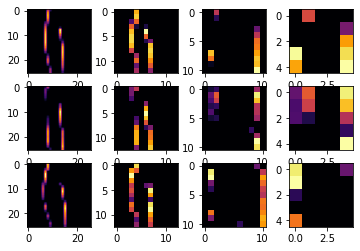

In [27]:
#Visualization
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3, 4)
first_im = 2 
second_im = 3 
third_im = 5
convolution_number = 2

from tensorflow.keras import models
#getting the outputs of the layers
layer_outputs = [layer.output for layer in model.layers] 
activation_model = tf.keras.models.Model(inputs = model.inputs, outputs = layer_outputs)

for x in range(0,4): # 2 cov + 2 pooling 
    f1 = activation_model.predict(test_images[first_im].reshape(1, 28, 28,1))[x]
    axarr[0,x].imshow(f1[0,:,:,convolution_number], cmap = 'inferno')
    axarr[0,x].grid(False)
    f2 = activation_model.predict(test_images[second_im].reshape(1,28,28,1))[x]
    axarr[1,x].imshow(f2[0,:,:,convolution_number], cmap = 'inferno')
    axarr[1,x].grid(False)
    f3 = activation_model.predict(test_images[third_im].reshape(1,28,28,1))[x]
    axarr[2,x].imshow(f3[0,:,:,convolution_number], cmap = 'inferno')
    axarr[2,x].grid(False)
